# Analisi dei dati raccolti

## Setup

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from types import FunctionType

In [22]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Hashing")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [23]:
PATH = "../asconhashav12/data/{}.csv"

IMPLEMENTATIONS = [
    "armv6m", "armv6m_lowsize", "bi32", "bi32_armv6m", "bi32_lowreg", "bi32_lowsize", "opt32", "opt32_lowsize", "ref"
]

armv6m = pd.read_csv(open(PATH.format("armv6m"), "r"), delimiter=";")
armv6m_lowsize = pd.read_csv(open(PATH.format("armv6m_lowsize"), "r"), delimiter=";")
bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv6m = pd.read_csv(open(PATH.format("bi32_armv6m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
bi32_lowsize = pd.read_csv(open(PATH.format("bi32_lowsize"), "r"), delimiter=";")
opt32 = pd.read_csv(open(PATH.format("opt32"), "r"), delimiter=";")
opt32_lowsize = pd.read_csv(open(PATH.format("opt32_lowsize"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    armv6m, armv6m_lowsize, bi32, bi32_armv6m, bi32_lowreg, bi32_lowsize, opt32, opt32_lowsize, ref
]

INDEX = armv6m.columns

## Grafici

Ogni grafico presente in questo notebook è suddiviso in nove parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di generazione dell'hash di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

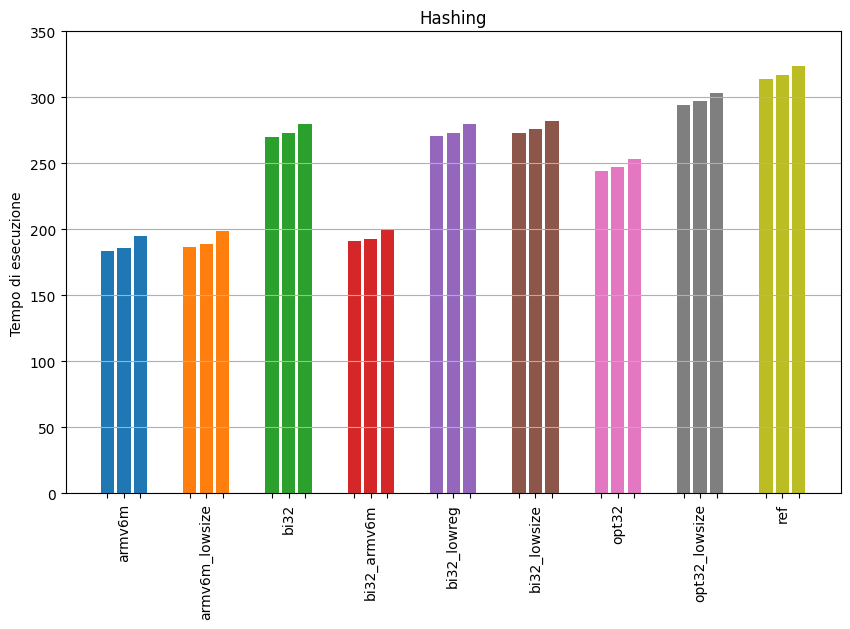

In [24]:
# Generazione hash
plotter(DATAFRAMES, "0B", IMPLEMENTATIONS, 50)

### PT 8 byte

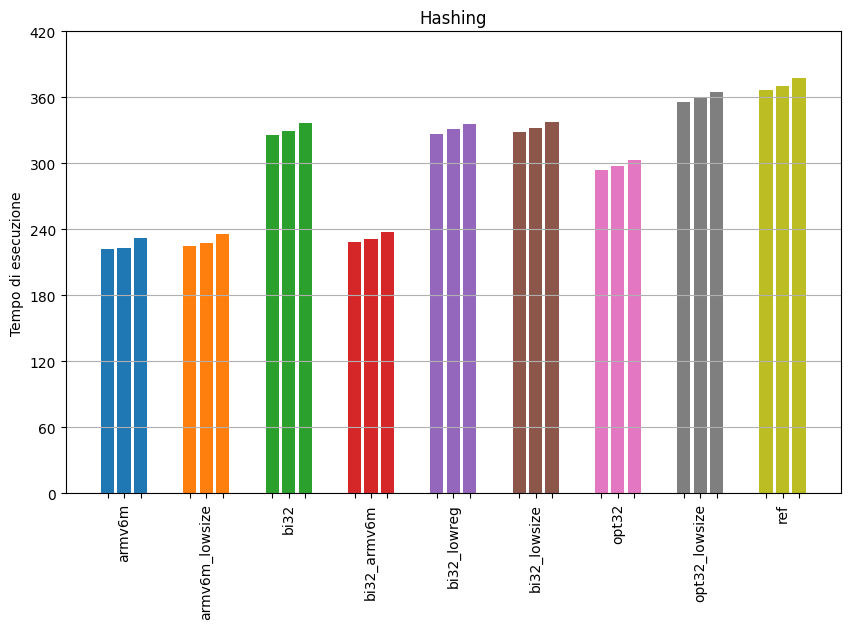

In [25]:
# Generazione hash
plotter(DATAFRAMES, "8B", IMPLEMENTATIONS, 60)

### PT 16 byte

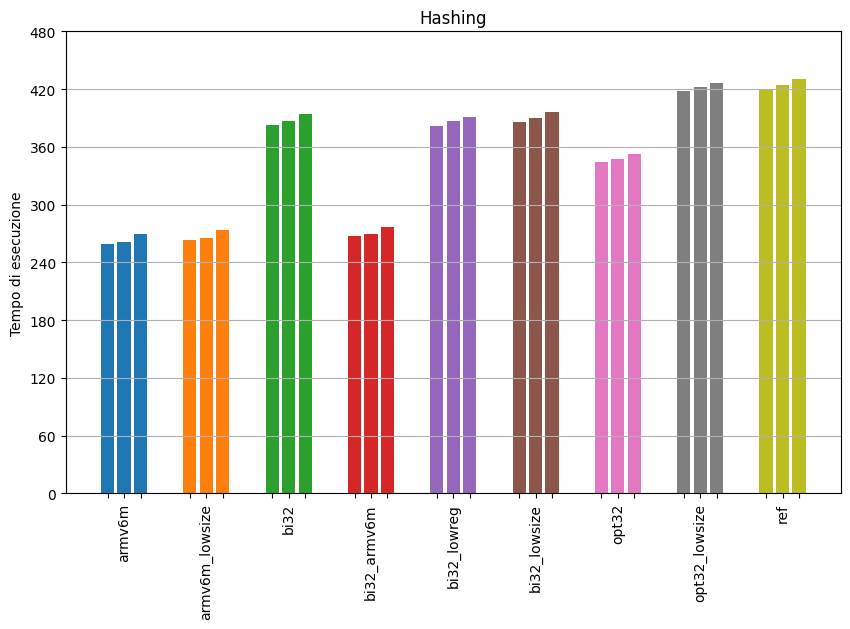

In [26]:
# Generazione hash
plotter(DATAFRAMES, "16B", IMPLEMENTATIONS, 60)

### PT 32 byte

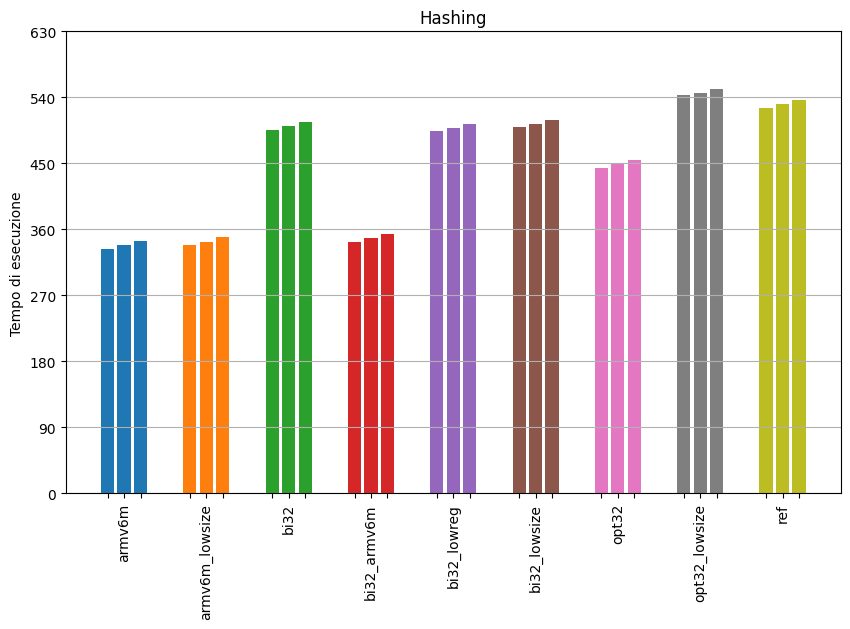

In [27]:
# Generazione hash
plotter(DATAFRAMES, "32B", IMPLEMENTATIONS, 90)

### PT 64 byte

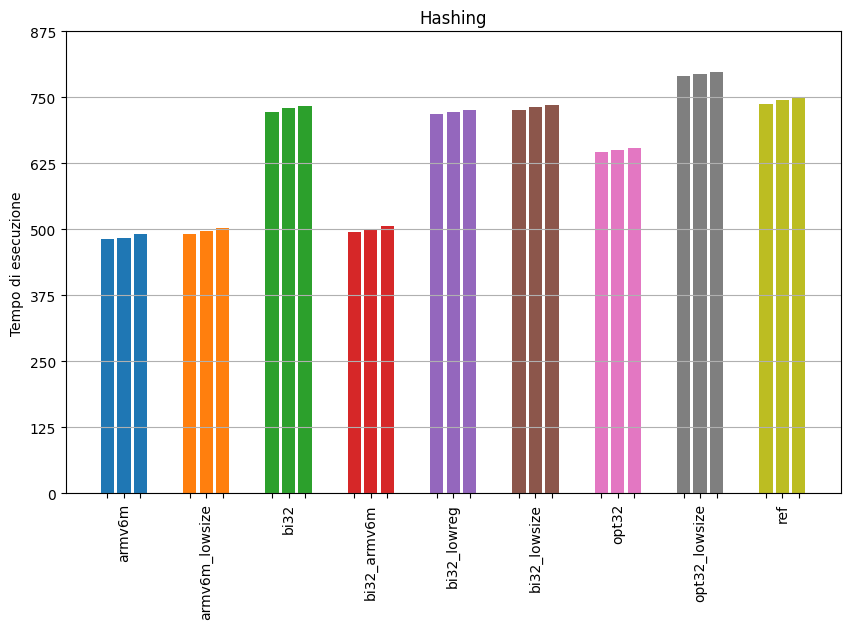

In [28]:
# Generazione hash
plotter(DATAFRAMES, "64B", IMPLEMENTATIONS, 125)

### PT 128 byte

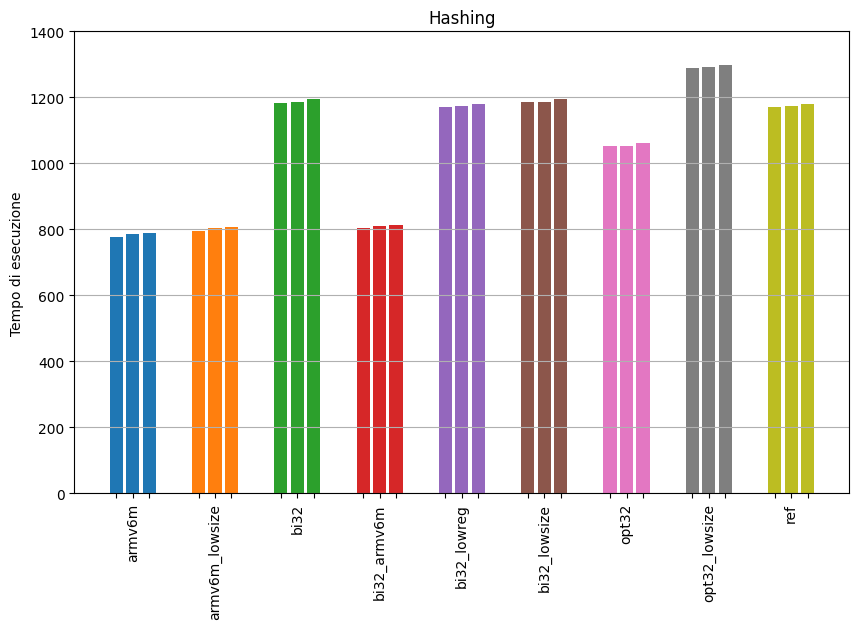

In [29]:
# Generazione hash
plotter(DATAFRAMES, "128B", IMPLEMENTATIONS, 200)

### PT 256 byte

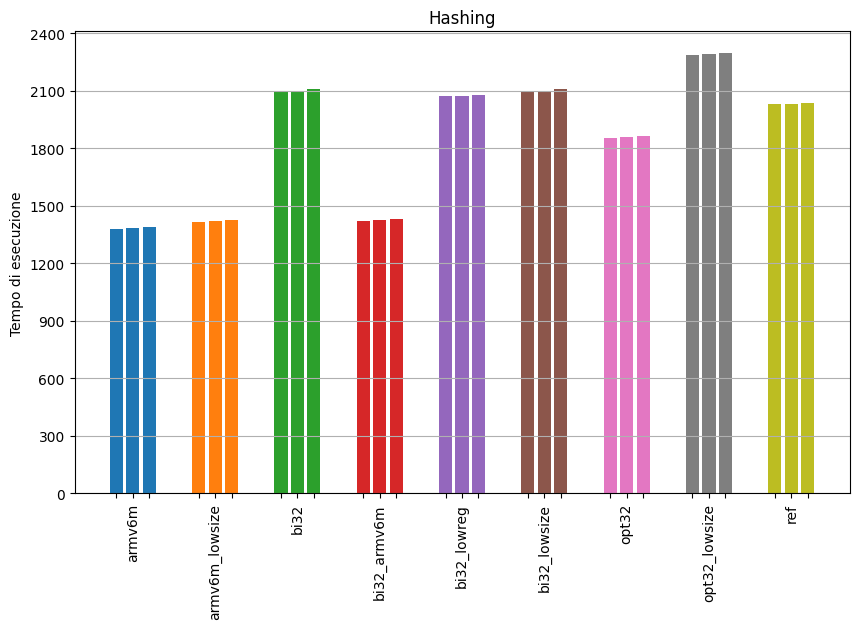

In [30]:
# Generazione hash
plotter(DATAFRAMES, "256B", IMPLEMENTATIONS, 300)

### PT 512 byte

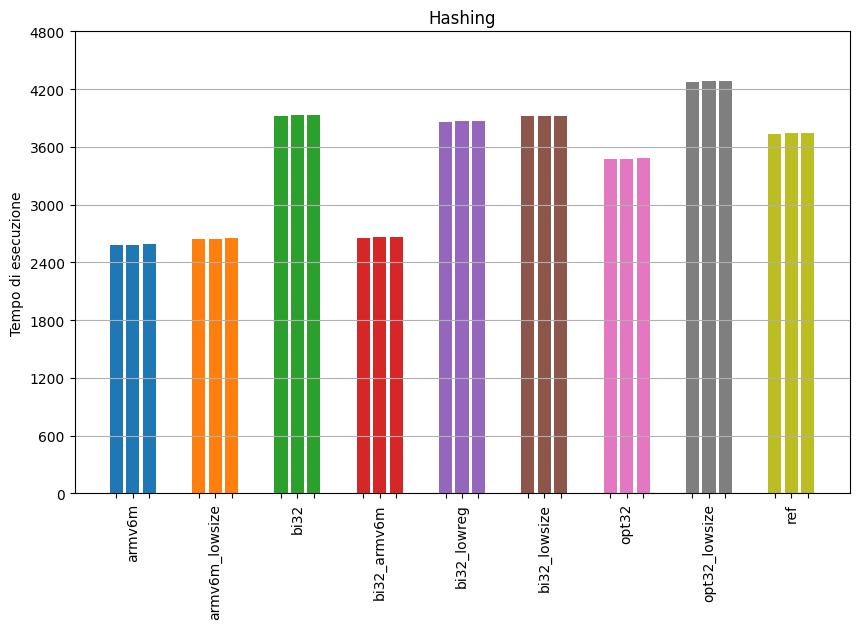

In [31]:
# Generazione hash
plotter(DATAFRAMES, "512B", IMPLEMENTATIONS, 600)

### PT 1024 byte

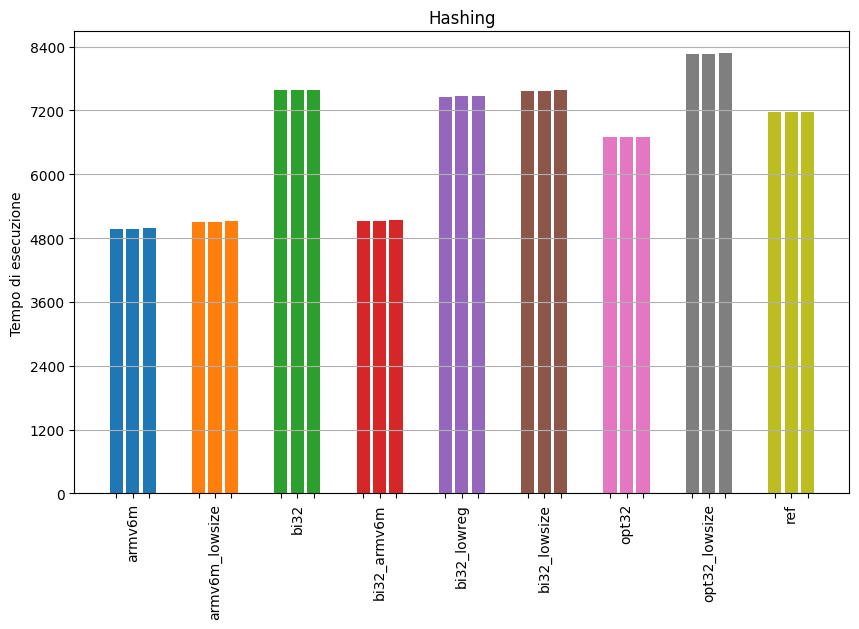

In [32]:
# Generazione hash
plotter(DATAFRAMES, "1024B", IMPLEMENTATIONS, 1200)

## Conclusioni

### Setup

In [33]:
def checker(dataframes: list, columns: list, index: int, check: FunctionType) -> None:
    for column in columns:
        test_series = dataframes[index][column]
        for i in range(len(dataframes)):
            if i == index:
                continue
            series = dataframes[i][column]
            assert check(test_series.min(), series.min())
            assert check(test_series.mean(), series.mean())
            assert check(test_series.max(), series.max())

    print("Nessuna AssertionError è stata sollevata")

In [34]:
def template(best: pd.DataFrame, worst: pd.DataFrame, columns: list, calculate: FunctionType) -> None:
    results = [[], [], []]
    for column in columns:
        best_series = best[column]
        worst_series = worst[column]
        results[0].append(calculate(best_series.min(), worst_series.min()))
        results[1].append(calculate(best_series.mean(), worst_series.mean()))
        results[2].append(calculate(best_series.max(), worst_series.max()))
    
    results = [
        [min(results[0]), max(results[0])],
        [min(results[1]), max(results[1])],
        [min(results[2]), max(results[2])]
    ]

    print(f"Rispetto alla misurazione minima: da {results[0][0]} a {results[0][1]}")
    print(f"Rispetto alla misurazione media: da {results[1][0]} a {results[1][1]}")
    print(f"Rispetto alla misurazione massima: da {results[2][0]} a {results[2][1]}")

In [35]:
def times(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( worst/best, 2 )
    template(best, worst, columns, calculate)
    
    
def percentage_increase(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( ((worst * 100) / best) - 100, 2 )
    template(best, worst, columns, calculate)

### Migliori implementazioni

L'implementazione `armv6m` è quella che ha ottenuto i tempi di esecuzione migliori in ogni possibile grandezza di PT considerata, anche se le implementazioni `armv6m_lowsize` e `bi32_armv6m` hanno tempi molto simili

Queste tre implementazioni sono tutte ottimizzate per architetture ARMv6-M

In [36]:
# Armv6m migliore implementazione
for i in range(len(INDEX)):
    try:
        checker(DATAFRAMES, INDEX[i:i+1], 0, lambda x,y : x < y)
    except AssertionError:
        print(f"Armv6m non domina {INDEX[i]}")
    print()

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata



### Peggiori implementazioni

Considerando PT di grandezza $0$, $8$ e $16$ byte, l'implementazione peggiore è la `ref`

Considerando invece PT di grandezza $32$, $64$, $128$, $256$, $512$ e $1024$ byte, l'implementazione peggiore è la `opt32_lowsize`

Notiamo subito come le implementazioni peggiori sono quelle che cercano di ottimizzare architetture $32$ bit generiche oppure quella priva di ottimizzazioni

In [37]:
# Ref e opt32_lowsize peggiori implementazioni
for i in range(len(INDEX)):
    try:
        checker(DATAFRAMES, INDEX[i:i+1], 7, lambda x,y : x > y)
    except AssertionError:
        print(f"Opt32_lowsize non domina {INDEX[i]}")
    try:
        checker(DATAFRAMES, INDEX[i:i+1], 8, lambda x,y : x > y)
    except AssertionError:
        print(f"Ref non domina {INDEX[i]}")
    print()

Opt32_lowsize non domina 0B
Nessuna AssertionError è stata sollevata

Opt32_lowsize non domina 8B
Nessuna AssertionError è stata sollevata

Opt32_lowsize non domina 16B
Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata
Ref non domina 32B

Nessuna AssertionError è stata sollevata
Ref non domina 64B

Nessuna AssertionError è stata sollevata
Ref non domina 128B

Nessuna AssertionError è stata sollevata
Ref non domina 256B

Nessuna AssertionError è stata sollevata
Ref non domina 512B

Nessuna AssertionError è stata sollevata
Ref non domina 1024B



In [38]:
# Opt32_lowsize quanti punti percentuali è peggio di armv6m, migliore
percentage_increase(armv6m, opt32_lowsize, INDEX)

Rispetto alla misurazione minima: da 59.78 a 66.19
Rispetto alla misurazione media: da 59.95 a 66.0
Rispetto alla misurazione massima: da 55.38 a 66.07


### Dimensione eseguibile

Potevamo aspettarcelo dal nome: le implementazioni `lowsize` sono quelle che hanno una dimensione dell'eseguibile molto piccola, occupando circa il $5/6$\% dello spazio disponibile, mentre l'implementazione `ref` è quella più pesante, occupando circa il $12/13$\% dello spazio disponibile

Considerando l'implementazione migliore, quindi la `armv6m`, essa occupa circa il $6/7$\% dello spazio disponibile, dimostrandosi un'ottima soluzione anche per quanto riguarda lo spazio occupato